# Домашнее задание - линейная регрессия

### Работа с признаками (8 баллов)

Скачайте датасет из материалов к уроку или по ссылке https://raw.githubusercontent.com/jupiterzhuo/travel-insurance/master/travel%20insurance.csv 


Описание признаков:

* Agency — название страхового агентства
* Agency Type — тип страхового агентства
* Distribution Channel — канал продвижения страхового агентства
* Product Name — название страхового продукта
* Duration — длительность поездки (количество дней)
* Destination — направление поездки
* Net Sales — сумма продаж 
* Commission (in value) — комиссия страхового агентства
* Gender — пол застрахованного
* Age — возраст застрахованного

Ответ:
* Claim — потребовалась ли страховая выплата: «да» — 1, «нет» — 0

Обработайте пропущенные значения и примените написанные функции onehot_encode() и minmax_scale().

**Подсказка**: маску для категориальных признаков можно сделать фильтром cat_features_mask = (df.dtypes == "object").values

In [1]:
import pandas as pd
import numpy as np
from sklearn import impute
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Прочитать csv файл
df = pd.read_csv("travel insurance.csv",
                 header=0,index_col=False,delimiter=',')

print(df.info())


# Claim column contains words "NO" and "Yes", we simply replace them with 0 / 1
df.loc[df['Claim']=='No','Claim'],df.loc[df['Claim']=='Yes','Claim']=0,1
df['Claim'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB
None


Claim
0    62399
1      927
Name: count, dtype: int64

In [3]:
# Gender содержит много пустых значений
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [4]:
# new variable for categorical features
categorical_features=(df.dtypes == "object").values
print(categorical_features,end='\n\n')
# in gender column null values are replaced with empty strings
df_cat=df[df.columns[categorical_features]].fillna('')
# replace numerical values with mean
df_num=df[df.columns[~categorical_features]]
replacer = impute.SimpleImputer(strategy="mean")
df_num=pd.DataFrame(data=replacer.fit_transform(df_num), columns=df_num.columns)
df_mod=pd.concat([df_num,df_cat],axis=1)

[ True  True  True  True  True False  True False False  True False]


In [5]:
# Here is a function which has the same functionality as a MinMax scaler from a sklearn library
def minmax_scale(matrix, feature_range=(0, 1)):
    l, r = feature_range
    columns = matrix.shape[1]
    # get minimal and maximal values from each column
    min_values = np.min(matrix, axis=0)
    max_values = np.max(matrix, axis=0)
    value_range = max_values - min_values
    # check if there are same min and max values for one feature
    are_not_equal = [value_range != 0]
    # print(are_not_equal)
    # create a matrix shaped as an original and fill it with zeros
    updated_scaled_matrix = np.zeros(shape=matrix.shape, dtype=float)
    # traverse through al columns
    for i in range(columns):
        # if the value range is not 0
        if value_range[i]:
            updated_scaled_matrix[:, i] = (matrix[:, i] - min_values[i]) / value_range[i] * (r - l) + l
    return updated_scaled_matrix

In [6]:
# function below is a manual implementation of a one hot encoding
def onehot_encoding(x, column_name=None):
    classes_set = sorted(list(set(x)))
    classes_dict = dict()
    classes = 0
    for i in classes_set:
        if i not in classes_dict.keys():
            classes_dict[i] = classes
            classes += 1
    one_hot = np.zeros(shape=(len(x), classes))
    for i in range(len(x)):
        one_hot[i][classes_dict[x[i]]] = 1
    one_hot_column_names = pd.DataFrame(one_hot.astype('int'))
    # column names are added to make data readable

    
    # Here I will prepare dictionary for downsampling
    dict_={column_name:[i for i in classes_set]}
    # encoded categorical features
    one_hot_column_names.columns = [f'{column_name}_{i}' for i in classes_set]
    return one_hot_column_names,dict_

In [7]:
df_one_hot=pd.get_dummies(df_mod)
df_one_hot

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,...,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE,Gender_,Gender_F,Gender_M
0,186.0,-29.0,9.57,81.0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,186.0,-29.0,9.57,71.0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,65.0,-49.5,29.70,32.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,60.0,-39.6,23.76,32.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,79.0,-19.8,11.88,41.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,111.0,35.0,12.25,31.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
63322,58.0,40.0,14.00,40.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
63323,2.0,18.0,6.30,57.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
63324,3.0,18.0,6.30,63.0,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [8]:
# Now lets use one hot encoding to change categorical features to a numerical
df_encoded=df_mod.copy()
dict_for_downsampling=dict()
for i in df_mod:
    if df_mod[i].dtype=='object':
        data_to_convert=df_mod[i]
        one_hot_encoded,dict_=onehot_encoding(data_to_convert,column_name=i)
        dict_for_downsampling[i]=dict_[i]
        df_encoded=df_encoded.drop(i,axis=1)
        df_encoded=pd.concat([df_encoded,one_hot_encoded],axis=1)
[df_encoded==df_one_hot]
# As you can see my function works as well as the original one (all features are the same)

[       Duration  Net Sales  Commision (in value)   Age  Claim  Agency_ADM  \
 0          True       True                  True  True   True        True   
 1          True       True                  True  True   True        True   
 2          True       True                  True  True   True        True   
 3          True       True                  True  True   True        True   
 4          True       True                  True  True   True        True   
 ...         ...        ...                   ...   ...    ...         ...   
 63321      True       True                  True  True   True        True   
 63322      True       True                  True  True   True        True   
 63323      True       True                  True  True   True        True   
 63324      True       True                  True  True   True        True   
 63325      True       True                  True  True   True        True   
 
        Agency_ART  Agency_C2B  Agency_CBH  Agency_CCR  ...  \

In [9]:
# Now i want to test hot sklearn MinMax scaller works
from sklearn.preprocessing import MinMaxScaler
originally_num_columns=['Net Sales','Commision (in value)']
skaler_matrix=df_encoded[originally_num_columns].copy()
scaler = MinMaxScaler()
scaler.fit(skaler_matrix)
print(scaler.transform(skaler_matrix))

[[0.30025021 0.03375661]
 [0.30025021 0.03375661]
 [0.28315263 0.1047619 ]
 ...
 [0.33944954 0.02222222]
 [0.33944954 0.02222222]
 [0.34612177 0.03209877]]


In [10]:
# Now let's normalize the numerical data using MinMaxScale

# categorical features are dropped
numerical_df=df_encoded[originally_num_columns].copy()
numerical_df=pd.DataFrame(minmax_scale(numerical_df.values))
numerical_df
# Result of my function is almost the same as the sklearn's (my numbers are rounded to 6 decimals)

,0,1
0,0.300250,0.033757
1,0.300250,0.033757
2,0.283153,0.104762
3,0.291410,0.083810
4,0.307923,0.041905
...,...,...
63321,0.353628,0.043210
63322,0.357798,0.049383
63323,0.339450,0.022222
63324,0.339450,0.022222


In [11]:
# We have numerical_df dataset with numerical normalized data and df_encoded with one_hot_encoded values
numerical_df.columns=originally_num_columns
for columns in numerical_df.columns:
    df_encoded[columns]=numerical_df[columns]
df_downsampling=df_encoded.copy()
df_encoded
# This DataFrame contains numerical data (normalized with MinMaxScale) and converted categorical data

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,...,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE,Gender_,Gender_F,Gender_M
0,186.0,0.300250,0.033757,81.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,186.0,0.300250,0.033757,71.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,65.0,0.283153,0.104762,32.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,0.291410,0.083810,32.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,79.0,0.307923,0.041905,41.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,111.0,0.353628,0.043210,31.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63322,58.0,0.357798,0.049383,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63323,2.0,0.339450,0.022222,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63324,3.0,0.339450,0.022222,63.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


Подробный анализ и подготовка датасета часто помогают улучшить качество модели. Ниже представлено несколько идей преобразований. Вы можете применить одно или несколько из этих преобразований (а можете не применять), чтобы помочь будущей модели. 

1. Посмотрите на количественные признаки. Возможно, в некоторых признаках есть выбросы - значения, которые сильно выбиваются. Такие значения полезно удалять. Советуем присмотреться к колонке Duration)

2. Можно заметить, что one hot encoding сильно раздувает количество столбцов. Радикальное решение - можно попробовать выбросить все категориальные признаки из датасета.

3. Если все-таки оставляете категориальные признаки, то подумайте, как уменьшить количество столбцов после one hot encoding. Признаки с большим количеством значений (Duration - 149! разных стран) можно удалить или попробовать сгруппировать некоторые значения.

4. Downsampling. Датасет достаточно большой, разница в классах огромная. Можно уменьшить число наблюдений с частым ответом.

(array([4.5369e+04, 1.0343e+04, 3.1680e+03, 1.3670e+03, 6.4100e+02,
        3.3400e+02, 1.2600e+02, 1.6640e+03, 2.5900e+02, 2.6000e+01,
        1.2000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

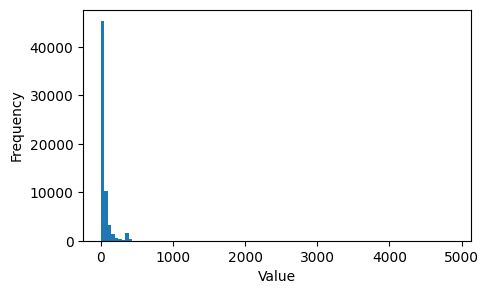

In [12]:
# Now i want to analyze extremely small or big values in 'Duration' column
# Let's plot this category
# modified dataset is called df_encoded
duration=df_encoded['Duration']
plt.figure(figsize=(5, 3))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(duration,bins=100)
# as you can see, there are many points that have a huge value (duration>5000) 

In [13]:
# This may affect the future data fitting, to solve that I will drop columns where duration<0 or duration>400
print(duration.sort_values())
print(duration.max(),duration.min())
# how many elements > 400
print((duration>400).sum())
# drop extreme values
filtered_duration=duration[(duration >= 0) & (duration < 400)]
print(filtered_duration)

14943      -2.0
52587      -1.0
52588      -1.0
59528      -1.0
56668      -1.0
          ...  
12059    4831.0
9232     4844.0
8686     4847.0
6847     4857.0
3025     4881.0
Name: Duration, Length: 63326, dtype: float64
4881.0 -2.0
196
0        186.0
1        186.0
2         65.0
3         60.0
4         79.0
         ...  
63321    111.0
63322     58.0
63323      2.0
63324      3.0
63325     22.0
Name: Duration, Length: 63119, dtype: float64


(array([4.059e+03, 8.111e+03, 7.141e+03, 5.345e+03, 4.390e+03, 3.507e+03,
        3.012e+03, 2.584e+03, 2.371e+03, 2.007e+03, 1.764e+03, 1.434e+03,
        1.340e+03, 1.243e+03, 1.075e+03, 9.560e+02, 8.710e+02, 8.100e+02,
        7.770e+02, 6.680e+02, 6.450e+02, 5.690e+02, 5.260e+02, 5.020e+02,
        4.130e+02, 4.110e+02, 3.510e+02, 3.080e+02, 2.920e+02, 2.730e+02,
        2.070e+02, 1.970e+02, 1.890e+02, 1.790e+02, 1.610e+02, 1.510e+02,
        1.640e+02, 1.540e+02, 1.420e+02, 1.360e+02, 1.320e+02, 1.120e+02,
        8.200e+01, 8.900e+01, 8.300e+01, 8.700e+01, 7.900e+01, 1.030e+02,
        7.200e+01, 7.400e+01, 6.300e+01, 5.600e+01, 5.300e+01, 5.700e+01,
        4.100e+01, 4.500e+01, 5.700e+01, 3.900e+01, 5.200e+01, 3.800e+01,
        4.600e+01, 4.600e+01, 2.500e+01, 3.400e+01, 2.100e+01, 2.800e+01,
        2.800e+01, 3.300e+01, 3.300e+01, 2.800e+01, 2.000e+01, 1.500e+01,
        1.600e+01, 1.100e+01, 1.300e+01, 1.300e+01, 1.300e+01, 1.100e+01,
        1.300e+01, 1.100e+01, 1.100e+0

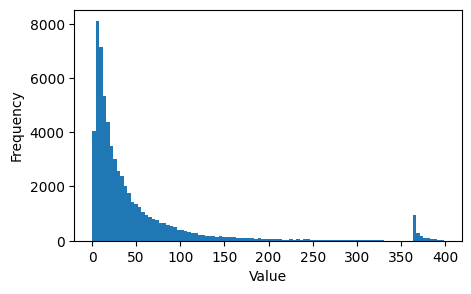

In [14]:
# plot the filtered duration
plt.figure(figsize=(5, 3))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(filtered_duration,bins=100)
# now our graph looks natural (without extreme values)

33


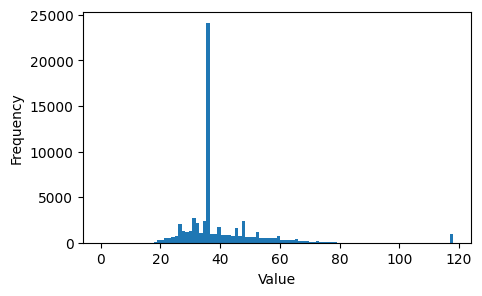

In [15]:
plt.figure(figsize=(5, 3))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(df_encoded['Age'],bins=100)
# age column also contain extreme values
print((df_encoded['Age'] < 10).sum())
# or df_encoded['Age'] > 100

(array([6.0000e+00, 5.0000e+00, 5.0000e+00, 8.0000e+00, 0.0000e+00,
        1.5000e+01, 1.2000e+01, 2.1000e+01, 2.4000e+01, 0.0000e+00,
        4.2000e+01, 8.2000e+01, 1.9600e+02, 0.0000e+00, 3.2600e+02,
        5.1800e+02, 5.2100e+02, 6.2100e+02, 0.0000e+00, 7.8400e+02,
        9.8200e+02, 1.0560e+03, 0.0000e+00, 1.2480e+03, 1.2170e+03,
        1.3320e+03, 2.6510e+03, 0.0000e+00, 1.0780e+03, 1.1060e+03,
        1.0200e+03, 0.0000e+00, 2.3440e+03, 2.4133e+04, 9.8500e+02,
        8.9900e+02, 0.0000e+00, 9.2200e+02, 7.9900e+02, 8.1300e+02,
        0.0000e+00, 8.0100e+02, 8.0100e+02, 7.8500e+02, 8.2800e+02,
        0.0000e+00, 8.0200e+02, 7.1800e+02, 2.3710e+03, 0.0000e+00,
        6.4300e+02, 6.0100e+02, 6.1000e+02, 5.6400e+02, 0.0000e+00,
        6.3000e+02, 5.5400e+02, 4.9200e+02, 5.2200e+02, 0.0000e+00,
        5.4200e+02, 4.6100e+02, 4.0900e+02, 0.0000e+00, 3.5700e+02,
        3.4100e+02, 2.7100e+02, 2.7100e+02, 0.0000e+00, 2.4500e+02,
        2.2500e+02, 2.0100e+02, 0.0000e+00, 1.72

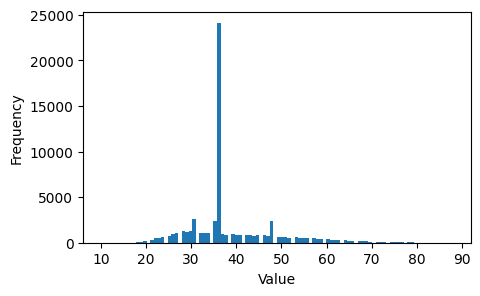

In [16]:
# Now let's prepare data for learning process
df_final = df_encoded[~((df_encoded['Duration'] <= 0) | (df_encoded['Duration'] > 400) | (df_encoded['Age'] < 10) | (df_encoded['Age'] > 100))]
plt.figure(figsize=(5, 3))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(df_final['Age'],bins=100)

### Применение линейной регрессии (10 баллов)

Это задача классификации, но её можно решить с помощью линейной регрессии, если округлять предсказанный ответ до целого и выбирать ближайший по значению ответ из множества {0, 1}.

Вынесите признак 'Claim' в вектор ответов и разделите датасет на обучающую и тестовую выборку в соотношении 80 к 20. Зафиксируйте random_state.

**Подсказка:** быстро перевести Yes/No в 1/0 можно так - np.where(df['Claim'] == 'Yes', 1,0)

In [17]:
# разделение на test/train

# Для начала решим задачу для duration / claim


y=df_final['Claim']
X=df_final[['Duration']]
# разделить датасет
X_train, X_test, y_ans_train, y_ans_test = train_test_split(X, y, train_size=0.8)
X

,Duration
0,186.0
1,186.0
2,65.0
3,60.0
4,79.0
...,...
63321,111.0
63322,58.0
63323,2.0
63324,3.0


Найдите аналитическое решение для обучающей выборки: обычное и регуляризацией l2. 

In [18]:
# посчитайте аналитическое решение
analytical_weights=np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y_ans_train)
analytical_weights

array([0.0002125])

In [19]:
# посчитать аналитическое решение с регуляризацией
E = np.eye(X_train.shape[1])
lamb=1
regularized_weights=np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)+np.dot(E,np.square(lamb))),X_train.T),y_ans_train)
regularized_weights

array([0.0002125])

Постройте модель LinearRegression, примените к тестовой выборке и посчитайте MSE (можно использовать библиотеку sklearn)

In [20]:
# Compute MSE of my model (regularized_weights and analytical_weights)
def count_MSE(y_true,y_pred):
    return np.mean(np.square(y_true-y_pred))

In [21]:
y_pred=np.dot(X_test,analytical_weights).round()
print(count_MSE(y_ans_test,y_pred))

0.014819587628865979


In [22]:
y_pred_regularized=np.dot(X_test,regularized_weights).round()
print(count_MSE(y_ans_test,y_pred_regularized))

0.014819587628865979


In [23]:
# обучите модель линейной регрессии LinearRegression на обучающей выборке, примените к тестовой
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_ans_train)
y_predicted = lr.predict(X_test).round()
print(lr.coef_)

[0.00017019]


In [24]:
# посчитайте MSE, предварительно округлив предсказанные ответы до целого
MSE_sklearn = mean_squared_error(y_ans_test, y_predicted)
print(MSE_sklearn)

0.014819587628865979


In [25]:
Далее попробуем обучить модель со всеми возможными комбинациями числовых фичей
Колонки Duration и Age предварительно будут обработаны с помощью MinMaxScale, во избежание перекрытия значений

SyntaxError: invalid syntax (831766336.py, line 1)

In [26]:
# # Now we can normalize age and duration data
scaled_matrix = minmax_scale(df_final[['Duration', 'Age']].values)
# Use .loc for assignment
df_final.loc[:, ['Duration', 'Age']] = scaled_matrix
df_final

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,...,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE,Gender_,Gender_F,Gender_M
0,0.463659,0.300250,0.033757,0.910256,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.463659,0.300250,0.033757,0.782051,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.160401,0.283153,0.104762,0.282051,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.147870,0.291410,0.083810,0.282051,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.195489,0.307923,0.041905,0.397436,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,0.275689,0.353628,0.043210,0.269231,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63322,0.142857,0.357798,0.049383,0.384615,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63323,0.002506,0.339450,0.022222,0.602564,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63324,0.005013,0.339450,0.022222,0.679487,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
import itertools
# here I will find all possible combinations of numerical features
features=df_final.drop('Claim',axis=1).iloc[:, :4].columns.tolist()
all_combinations = []
for r in range(1,len(features) + 1):
    subsets = list(itertools.combinations(features, r))
    all_combinations.extend(subsets)
all_combinations

[('Duration',),
 ('Net Sales',),
 ('Commision (in value)',),
 ('Age',),
 ('Duration', 'Net Sales'),
 ('Duration', 'Commision (in value)'),
 ('Duration', 'Age'),
 ('Net Sales', 'Commision (in value)'),
 ('Net Sales', 'Age'),
 ('Commision (in value)', 'Age'),
 ('Duration', 'Net Sales', 'Commision (in value)'),
 ('Duration', 'Net Sales', 'Age'),
 ('Duration', 'Commision (in value)', 'Age'),
 ('Net Sales', 'Commision (in value)', 'Age'),
 ('Duration', 'Net Sales', 'Commision (in value)', 'Age')]

In [28]:
class CustomModel:
    def __init__(self, x_train, y_train,x_test):
        self.x_train = x_train
        self.y_train = y_train
        self.y_test=[]
        self.x_test=x_test
        self.w = []
        self.w_regularized = []

    def get_analytical_weights(self):
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(self.x_train.T, self.x_train)), self.x_train.T), self.y_train)
        return self.w

    def get_regularized_weights(self):
        lamb_=1
        e_ = np.eye(self.x_train.shape[1])
        self.w_regularized = np.dot(
            np.dot(np.linalg.inv(np.dot(self.x_train.T, self.x_train) + np.dot(e_, np.square(lamb_))), self.x_train.T), self.y_train)
        return self.w_regularized
        
    def get_predicted_ans(self,weights_type=0):
        if weights_type==0:
            self.y_test=np.dot(self.x_test,self.w).round()
        if weights_type==1:
            self.y_test=np.dot(self.x_test,self.w_regularized).round()  
        return self.y_test
            
    def count_MSE(self, y_true):
        return np.mean(np.square(y_true - self.y_test))

    def count_RMSE(self, y_true):
        return np.sqrt(self.count_MSE(y_true))


In [29]:
# Here I will try a model without using regularization
# WEIGHTS_TYPE = 0 : weights without regularization
# create a Dataframe without categorical features
df_num_features=df_final.drop('Claim',axis=1).iloc[:, :4]
for column_combinations in all_combinations:
    print(f'Current feature combination: {" and ".join(column_combinations)}')
    # create a new dataset with current columns
    df_combination=df_num_features
    # dropping other columns
    for column_names in df_combination.columns:
        if column_names not in list(column_combinations):
            df_combination=df_combination.drop(column_names,axis=1)
    X=df_combination
    X_train, X_test, y_ans_train, y_ans_test = train_test_split(X, y, train_size=0.8,random_state=1)
    my_model=CustomModel(X_train,y_ans_train,X_test)
    analytical_weights=my_model.get_analytical_weights()
    print(f'weights : {analytical_weights}')
    my_model.get_predicted_ans(weights_type=0)
    print(f'MSE: {my_model.count_MSE(y_ans_test)}')
    print(f'RMSE: {my_model.count_RMSE(y_ans_test)}')
    print()

Current feature combination: Duration
weights : [0.08654705]
MSE: 0.01369201030927835
RMSE: 0.11701286386239057

Current feature combination: Net Sales
weights : [0.04619692]
MSE: 0.01369201030927835
RMSE: 0.11701286386239057

Current feature combination: Commision (in value)
weights : [0.23103111]
MSE: 0.01369201030927835
RMSE: 0.11701286386239057

Current feature combination: Age
weights : [0.03503706]
MSE: 0.01369201030927835
RMSE: 0.11701286386239057

Current feature combination: Duration and Net Sales
weights : [0.06211366 0.02418788]
MSE: 0.01369201030927835
RMSE: 0.11701286386239057

Current feature combination: Duration and Commision (in value)
weights : [0.05833272 0.13471699]
MSE: 0.01369201030927835
RMSE: 0.11701286386239057

Current feature combination: Duration and Age
weights : [0.07294134 0.01423505]
MSE: 0.01369201030927835
RMSE: 0.11701286386239057

Current feature combination: Net Sales and Commision (in value)
weights : [0.02908731 0.16197615]
MSE: 0.0136920103092783

### Вывод (1 балла)

Напишите краткий вывод по заданию (достаточно пары предложений). Расскажите, какие способы предобработки данных вы выбрали и почему. Насколько хороша ваша модель?

In [30]:
Вывод: 
Метод линейной регресси не очень хорошо подходит для задач бинарной регресии, так как : 
А) Диапазон предсказанных значений для бинарной классификации это числа от 0 до 1, который в последствии округления чаще всего сводился к 0 в моей модели. Диапазон обычной задачи линейной регрессии это числа от -inf до +inf.
Б) При использовании MinMaxScaler, MSE и RMSE одиннаковый для разных наборов фич (предсказывается 0 почти всегда), поэтому сложно оценить эффективность модели для такой задачи.
В) Данный датасет содержит больше 62к нулей в колонке claim. Так как общий размер данных 63к, то модель не может научиться различать единицы.
С) Линейная регрессия очень чувствительна к выбросам, поэтому определение класса чаще всего неточна.
Д) Вместо линейной регрессии лучше использовать логистическую регрессию.

Краткое ревью моего кода:
Скачал датасет по ссылке и вывел инфо
Проработал пустые значения(категории заменил на пустую строку, числовые на средние)
Сравнил написанные мной функции minmaxscale, obehotencoding с оригинальными 
Начертил пару графиков и выявил выбросы
Написал функции по нахождению весов с регуляризацией и без (я решил выбросить все категорийные значения)
Написал класс для удобства обучения, который содержит всю нужную функциональность 
проверил комбинации различных фичей влияют на МСЕ и веса (все возможные комбинации)
запустил программу (решил не проверять действие на регуляризированных весах)

!!! Важно 
Данный код я попробовал на датасете, предоставленном в семинаре 3. В нем надо было предсказать цену. Данная модель хорошо справилась с задачей линейной регрессии, тоесть она является гибкой. 
Спасибо за внимание!!!

SyntaxError: invalid syntax (3176830690.py, line 1)

In [31]:
Работа над ошибками : downsapling 
Как описано выше, в датасете отношение 0 к 1: 62:1
поэтому я попробую downsampling (сокращу колличество 0 в записи от одного класса, отношение станет примерно 20:1)

SyntaxError: invalid syntax (2267158077.py, line 1)

In [32]:
df_downsampling
# it is just copied df_final

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,...,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE,Gender_,Gender_F,Gender_M
0,186.0,0.300250,0.033757,81.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,186.0,0.300250,0.033757,71.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,65.0,0.283153,0.104762,32.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,0.291410,0.083810,32.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,79.0,0.307923,0.041905,41.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,111.0,0.353628,0.043210,31.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63322,58.0,0.357798,0.049383,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63323,2.0,0.339450,0.022222,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63324,3.0,0.339450,0.022222,63.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
# dictionary of categorical values
# Example:
for i in dict_for_downsampling.keys():
    print(i,dict_for_downsampling[i][:4],sep=" ")

Agency ['ADM', 'ART', 'C2B', 'CBH']
Agency Type ['Airlines', 'Travel Agency']
Distribution Channel ['Offline', 'Online']
Product Name ['1 way Comprehensive Plan', '2 way Comprehensive Plan', '24 Protect', 'Annual Gold Plan']
Destination ['ALBANIA', 'ANGOLA', 'ARGENTINA', 'ARMENIA']
Gender ['', 'F', 'M']


In [34]:
# To begin with, let's downsaple the Agency type column
df_agency_downsapled = pd.DataFrame()
# create a list with needed column names
desired_features = ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']
for j in dict_for_downsampling['Agency Type']:
    desired_features.append(f'Agency Type_{j}')

# Number of columns of claim==0, to match the proportion 10/1

Number_of_claim_0=int((df_downsampling['Claim']==1).sum()*10/(len(desired_features)-5))

# Now all needed columns are in a list, so we drop remained
for columns in df_downsampling.columns:
    if columns not in desired_features:
        df_downsampling = df_downsampling.drop(columns, axis=1)
for i in dict_for_downsampling['Agency Type']:
    # Agency Type_ name of the one hot encoded column
    name = f'Agency Type_{i}'
    # we will take all columns where 'Claim' == 1, and only Number_of_claim_0 columns where 'Claim' == 0
    new_column_claim1 = df_downsampling.loc[(df_downsampling[name] == 1) & (df_downsampling['Claim'] == 1)]
    df_agency_downsapled = pd.concat([df_agency_downsapled, new_column_claim1])
    # now shuffle remaining data with Claim == 0, and take only 10 + 10 values
    new_column_claim0 = df_downsampling.loc[(df_downsampling[name] == 1) & (df_downsampling['Claim'] == 0)]
    # if column contains less than 10 features
    if len(new_column_claim0) <= 10:
        df_agency_downsapled = pd.concat([df_agency_downsapled, new_column_claim0])
    else:
        df_agency_downsapled = pd.concat([df_agency_downsapled, new_column_claim0.sample(frac=1, axis=0).iloc[:Number_of_claim_0]])
print((df_agency_downsapled['Claim']==1).sum())
print((df_agency_downsapled['Claim']==0).sum())
# as you can see, the proportion is 1/10

927
9270


In [35]:
import itertools
# here I will find all possible combinations of numerical features
features=df_agency_downsapled.drop('Claim',axis=1).iloc[:, :4].columns.tolist()
all_combinations = []
for r in range(1,len(features) + 1):
    subsets = list(itertools.combinations(features, r))
    all_combinations.extend(subsets)
all_combinations

[('Duration',),
 ('Net Sales',),
 ('Commision (in value)',),
 ('Age',),
 ('Duration', 'Net Sales'),
 ('Duration', 'Commision (in value)'),
 ('Duration', 'Age'),
 ('Net Sales', 'Commision (in value)'),
 ('Net Sales', 'Age'),
 ('Commision (in value)', 'Age'),
 ('Duration', 'Net Sales', 'Commision (in value)'),
 ('Duration', 'Net Sales', 'Age'),
 ('Duration', 'Commision (in value)', 'Age'),
 ('Net Sales', 'Commision (in value)', 'Age'),
 ('Duration', 'Net Sales', 'Commision (in value)', 'Age')]

In [36]:
df_agency_downsapled=df_agency_downsapled.sample(frac=1)
# out dataset is shuffled, just copy code and see how MSE changes 

In [37]:
# Here I will try a model without using regularization
# WEIGHTS_TYPE = 0 : weights without regularization
# create a Dataframe without categorical features
df_num_features=df_agency_downsapled.drop('Claim',axis=1).iloc[:, :4]
y=df_agency_downsapled['Claim']
for column_combinations in all_combinations:
    print(f'Current feature combination: {" and ".join(column_combinations)}')
    # create a new dataset with current columns
    df_combination=df_num_features
    # dropping other columns
    for column_names in df_combination.columns:
        if column_names not in list(column_combinations):
            df_combination=df_combination.drop(column_names,axis=1)
    X=df_combination
    X_train, X_test, y_ans_train, y_ans_test = train_test_split(X, y, train_size=0.8,random_state=1)
    my_model=CustomModel(X_train,y_ans_train,X_test)
    analytical_weights=my_model.get_analytical_weights()
    print(f'weights : {analytical_weights}')
    my_model.get_predicted_ans(weights_type=0)
    print(f'MSE: {my_model.count_MSE(y_ans_test)}')
    print(f'RMSE: {my_model.count_RMSE(y_ans_test)}')
    print()

Current feature combination: Duration
weights : [0.00070728]
MSE: 0.0857843137254902
RMSE: 0.2928895930645031

Current feature combination: Net Sales
weights : [0.27520186]
MSE: 0.0857843137254902
RMSE: 0.2928895930645031

Current feature combination: Commision (in value)
weights : [1.12098386]
MSE: 0.08480392156862746
RMSE: 0.2912111288543545

Current feature combination: Age
weights : [0.00180214]
MSE: 0.0857843137254902
RMSE: 0.2928895930645031

Current feature combination: Duration and Net Sales
weights : [0.0003569  0.21030399]
MSE: 0.0857843137254902
RMSE: 0.2928895930645031

Current feature combination: Duration and Commision (in value)
weights : [3.28187293e-04 8.22966989e-01]
MSE: 0.08480392156862746
RMSE: 0.2912111288543545

Current feature combination: Duration and Age
weights : [0.00051843 0.0011782 ]
MSE: 0.0857843137254902
RMSE: 0.2928895930645031

Current feature combination: Net Sales and Commision (in value)
weights : [0.18236141 0.6518895 ]
MSE: 0.08627450980392157
RM

In [38]:
Вывод
Техника downsampling помогла моей модели реально предсказывать классы в рамках задания бинарной классификации.
MSE и RMSE менялись в зависимости от предоставленной комбинации классов
Мы уменьшили колличество примеров где Claim == 0, поэтому модель лучше распознавала и отличала классы где Claim == 1 (не происходило переобучение на превосходящем в колличестве классе)
Эту модель можно попробовать на разных комбинациях downsampled категорийных признаков.

SyntaxError: invalid syntax (2453089677.py, line 2)